<a href="https://colab.research.google.com/github/jdariasl/ML_2020/blob/master/Labs/lab1/lab1_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Recuerda que una vez abierto, Da clic en "Copiar en Drive", de lo contrario no podras alamancenar tu progreso**

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.


In [ ]:
#configuración del laboratorio
# Ejecuta esta celda!
%load_ext autoreload
%autoreload 2
!wget https://raw.githubusercontent.com/jdariasl/ML_2020/master/Labs/commons/utils/general.py -O general.py
from general import configure_lab1_p2
configure_lab1_p2()
from lab1 import *
GRADER, x, y = part_2()

--2020-09-18 12:05:48--  https://raw.githubusercontent.com/jdariasl/ML_2020/master/Labs/commons/utils/general.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11474 (11K) [text/plain]
Saving to: ‘general.py’

general.py          100%[===================>]  11.21K  --.-KB/s    in 0s      

2020-09-18 12:05:48 (94.7 MB/s) - ‘general.py’ saved [11474/11474]

lab configuration started
installing libraries
downloading files
lab configured
cargando librerias y variables al ambiente


## Laboratorio 1 - Parte 2

**Regresión logística**



## Ejercicio 1: Contextualización del problema

En esta sesión de laboratorio, vamos a resolver un problema de clasificación. Los variables que vamos a usar ya se encuentran cargadas:



In [ ]:
# tienes ya cargadas las siguientes variables:
print("conjunto de datos, muestra \n",x[range(10), :] )
print("")
print(" muestra de etiquetas a predecir \n", y[range(10)])

conjunto de datos, muestra 
 [[ 3.92606402 -6.83699086]
 [ 7.43382787 -3.7485991 ]
 [ 6.20553473  4.77182668]
 [ 6.77983287 -3.07765299]
 [-5.92614125 -4.87588843]
 [ 7.49283136  3.9516693 ]
 [-1.65572633  6.86081477]
 [-8.14881988 -1.85421149]
 [ 8.12616581 -1.66701921]
 [ 9.73411311 -1.63724335]]

 muestra de etiquetas a predecir 
 [[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [ ]:
print((np.unique(y)))

[0 1]


In [ ]:
#Ejercicio de Codigo
def clases_muestras_carac(X, Y):
    """Esta funcion es encargada retornar el numero clases, muestras 
        y caracteristicas del conjunto de datos X y Y

        X: matriz numpy con el conjunto de datos para entrenamiento
        Y: matriz numpy con el conjunto de etiquetas
        retorna:
            numero de clases (int/float)
            numero de muestras (int/float)
            numero de caracteristicas (int/float)
    """
    ##Pista: es de utilidad el metodo np.unique ?
    N,nf =X.shape
    clases = len(np.unique(Y))
    
    return (N,nf,clases)

In [ ]:
## la funcion que prueba tu implementacion
GRADER.run_test("ejercicio1", clases_muestras_carac)

TEST EXITOSO!


En los problemas de clasificación, que lo permiten, es de utilidad visualizar los datos. De esta manera uno puede determinar que modelos o algortimos pueden tener mejor rendimiento. En la siguiente función, debera, graficar los datos usando la función [scatter](https://matplotlib.org/gallery/shapes_and_collections/scatter.html) de matplotlib.

In [ ]:
#Ejercicio de Codigo
def scatter_plot(X, Y):
    """Esta funcion es encargada de graficar usando un scatter plot
       un problema de clasificacion.

        X: matriz numpy con el conjunto de datos para entrenamiento.
           esta debera ser usada para los ejes del grafico. puede asumir
           que solo va tener dos columnas
        Y: matriz numpy con el conjunto de etiquetas. Debera se usada
           para mostrar en diferentes colores, las etiquetas de cada una
           de las muestras
        retorna:
            grafica matplotlib
    """
    ## puedes accerder con plt al funcion adecuacada
    ## Pista: recuerda como indexar matrices
    ## Pista: recuerda el uso de np.ravel
    

    plt.scatter(X[:,0],X[:,1], c=Y[:], alpha = 0.5)
    figure = plt.gcf()
    plt.show()   
    return (figure)

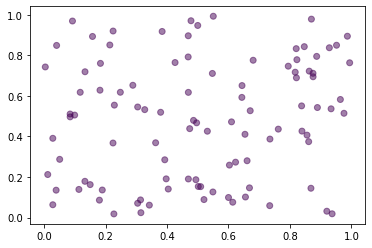

TEST EXITOSO!


In [ ]:
## la funcion que prueba tu implementacion
# ignora los graficos que se muestran 
GRADER.run_test("ejercicio2", scatter_plot)

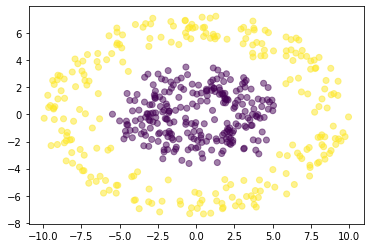

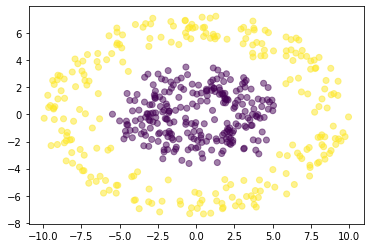

In [ ]:
scatter_plot(x, y)

In [ ]:
#@title Pregunta Abierta
#@markdown  ¿El problema es linealmente separable? justifique su respuesta 
respuesta_1 = "\"El problema no es linealmente separable porque una de las dos clases esta tan dispersa que esta encerrando a la otra, sin embargo  las muestras no se combinan por lo que da la impresion de que si es posible separarlos pero no linealmente.\"" #@param {type:"string"}

## Ejercicio 2: entrenamiento

En este laboratorio se va a realizar un procedimiento análogo al laboratorio anterior, pero con el modelo de *regresión logística* que sirve para resolver problemas de clasificación (en principio biclase).

Analice los siguientes métodos a la luz de la teoría vista para el modelo de regresión logística: 

1. función de activación (<font color='blue'>sigmoidal</font>),
2.  modelo de regresión logística (<font color='blue'>logistic_regression</font>), 
3. potencia del polinomio 
4.  el cálculo del error en clasificación (<font color='blue'>error_logistic</font>)
5. el gradiente descendente. 

Luego de recordar estos conceptos. Complete la función sigmoidal:

In [ ]:
#Ejercicio de Código
def sigmoidal(z):
    """Función de activación Sigmoidal

    z: es la varible a la que se le va aplicar el sigmoide.
       es un array numpy de uan sola dimension
    retorna: el valor del sigmiode

    """
    #Complete la siguiente línea con el código para calcular la salida de la función sigmoidal
    s =1/(1+np.exp(-(z))) 
    
    return s

In [ ]:
## la funcion que prueba tu implementacion
GRADER.run_test("ejercicio3", sigmoidal)

TEST EXITOSO!


El la siguiente celda se sugiere la implementación, de los siguientes conceptos:

1. modelo de regresión logística (<font color='blue'>logistic_regression</font>), 
2. potencia del polinomio 
3.  el cálculo del error en clasificación (<font color='blue'>error_logistic</font>)

comprenda que hacen estas funciones y ejecute la celda para cargar las funciones, para porder usarlas

In [ ]:
def logistic_regression(X, W):
    """calcula la regresión logistica
    X: los valores que corresponden a las caractersiticas
    W: son los pesos usadados para realizar la regresión
    retorna: valor estimado por la regresion
    """
    #Con np.dot se realiza el producto matricial. Aquí X (extendida) tiene dim [Nxd] y W es dim [dx1]
    Yest = np.dot(X,W)
    Y_lest = sigmoidal(Yest)
    #Se asignan los valores a 1 o 0 según el modelo de regresión logística definido
    pos = 0
    for tag in Y_lest:
        
        if tag > 0.5:
            Y_lest[pos] = 1
        elif tag < 0.5:
            Y_lest[pos] = 0
        
        pos += 1
    
    return Y_lest    #Y estimado: Esta variable contiene ya tiene la salida de sigm(f(X,W))

def potenciaPolinomio(X,grado):
    """calcula la potencia del polinomio
    X: los valores que corresponden a las caractersiticas
    grado: esl grado para realizar la potencia al polinomio
    retorna: el valor de X despues elevarlo al grado del polinimoo indicado
    """
    X2 = X.copy()
    
    if grado != 1:
        for i in range(2,grado+1):
            Xadd = X**i
            X2 = np.concatenate((X2, Xadd), axis=1)
    
    return X2

def error_logistic(Y_lest, Y):
    """calculo del error logistico
       Si es diferente el Y_estimado con el Y_real cuenta como un error
       Y_lest: numpy array con los valores de etiquetas estimadas
       Y:  numpy array  valor con los valores reales de las etiquetas
       retorna: error de clasificación -- numpy array
    """
    error = 0
    for ye, y in zip(Y_lest, Y):
        if ye != y:
            error += 1
    
    error = error/np.size(Y)

    return error

De igual manera, debemos extender nuestro conjunto de datos. Comprende que hace  la siguiente celda de código y ejecutala. **Muy importante ejecutar SOLA UNA vez.**

In [ ]:
#Aca llamamos la funcion creada anteriormente
# para obtener el numero muestras y caractersiticas
muestras,caracterisitcas,num_clases = clases_muestras_carac(x, y)
#Extendemos la matriz de X para el parámetro independiente
unos = np.array([np.ones(muestras)])
x = np.concatenate((unos.T, x), axis=1)
x = x.reshape(muestras, caracterisitcas+1)
y = y.reshape(np.size(y), 1)

recordando lo aprendido anteriormente, dividimos nuestro cojunto de datos y normalizamos.

In [ ]:
#Dejamos algunas muestras para el proceso de entrenamiento y otras para evaluar qué tan bueno fue el aprendizaje del modelo
random.seed(1)
N = muestras
ind=np.random.permutation(N)
Xtrain = x[ind[0:int(math.ceil(0.7*N))],:]
Xtest = x[ind[int(math.ceil(0.7*N)):N],:]
Ytrain = y[ind[0:int(math.ceil(0.7*N))]]
Ytest = y[ind[int(math.ceil(0.7*N)):N]]
# normalizamos
Xtrain, Xtest = normalizar(Xtrain, Xtest)

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/content/lab1.py:332: RuntimeWarning: invalid value encountered in true_divide
  Xtest_n = (Xtest - media )/desvia


Ahora vamos a completar el código de la regla de actualización de los parámetros del algoritmo de <font color='blue'>gradiente_descedente</font>: 


$$w_j(iter) = w_j(iter-1) - \eta \frac{\partial E(w)}{\partial w_j}$$ 

recordar que 

$$ \frac{\partial E(w)}{\partial w_j} = \frac{\partial E({\bf{w}})}{\partial w_j} = \frac{1}{N}\sum_{i=1}^{N}\left( f({\bf{x}}_i,{\bf{w}}) - y_i\right) \frac{\partial }{\partial w_j} f({\bf{x}}_i, {\bf{w}})$$

Recuerda que debe usar las funciones ya implementadas y no usar **ninguna otra libreria**, adicional a las librerias ya pre-cargadas como numpy.

Adicionalmente, dentro de nuestra función, **vamos incluir una transformación polinómica**.


Nota: Para el problema de clasificación tenga presente que si ya implementó la regla de actualización de parámetros para el modelo de regresión polinomial múltiple, este punto es trivial, puesto que sólo tiene que incluir la función sigmoidal tal como lo vimos en la teoría.

In [ ]:
#ejercicio de codigo
def gradiente_descendente_logistic_poly(X,Y,grado,eta, iteraciones):
    """Gradiente descendente para regresión lineal múltiple
    X: Matriz de datos extendida
    Y: vector con los valores a predecir
    W: Vector de parámetros del modelo
    eta: Taza de aprendizaje
    grado: grado para usar en la transformacion polinomica
    iteraciones: numero de iteraciones maxima

    retorna: W el valor de de los parametros de regresión polinomica
    """
    X2 = potenciaPolinomio(X,grado)
    #Tomamos el número de variables del problema leugo de la transformacion
    d = np.size(X2,1)
    #Tomamos el número de muestras de la base de datos
    N = np.size(X2,0)   
    #Inicializamos el vector de parámetros
    W = np.zeros(d)
    W = W.reshape(np.size(W),1)   
    for iter in range(iteraciones):
       
        #Aquí debe completar el código con la regla de actualización de los parámetros W para regresión
        #logística. Tenga en cuenta los nombres de las variables ya creadas: W, X, Y
        # Y_estimado = logistic_regression(X2,W)
        # A = (logistic_regression(X2,W)-Y.reshape(N,1))X2
        # suma= np.dot(W.T,X2.T).T
        # suma=(suma-Y.reshape(N,1))*X2
        # suma = np.sum(suma,axis=0,keepdims=True)/N
        # W = W-(eta*suma.T)
        # a=(logistic_regression(X2,W)-Y.reshape(N,1))*X2
        # sum= np.sum(a,axis=0,keepdims=True)/N
        # W=W-(eta*sum.T)    
        # a=(logistic_regression(X2,W)-Y.reshape(N,1))*X2
        # sum= np.sum(a,axis=0,keepdims=True)/N
        # W=W-(eta*sum.T)
        # Y_estimado = logistic_regression(X2,W)
        # a=(Y_estimado-Y)*X2
        # derivada = np.dot(X2.T,Y_estimado-Y)/N
        # print('derivada',derivada)
        # Wsig = W - eta*derivada
        # W = Wsig
        a=(logistic_regression(X2,W)-Y.reshape(N,1))*X2
        sum= np.sum(a,axis=0,keepdims=True)
        W=W-(eta*sum.T)/N
    #Error en clasificación  
    Y_estimado = logistic_regression(X2,W)
    error_clasificacion = error_logistic(Y_estimado,Y)
    print("error despues de finalizar la iteraciones", error_clasificacion)

    return W

In [ ]:
## la funcion que prueba tu implementacion
GRADER.run_test("ejercicio4", gradiente_descendente_logistic_poly)

error despues de finalizar la iteraciones 0.52
error despues de finalizar la iteraciones 0.51
TEST EXITOSO!


Finalmente se sugiere la siguiente funcion para evaluar el error del modelo. Entienda su funcionamiento.

In [ ]:
def evaluar_modelo (W, X_to_test, Y_True, grado):
    """ funcion que evalua un modelo de regresión usando el error cuadratico medio

    W: es un matriz con los parametros del modelo entrenados
    X_to_test: conjunto de datos para usar en el evaluamiento del modelo
    Y_True: valores reales para usar en el evaluamiento del modelo
    grado: valor del polinomio a usar

    retorna: el de clasificación.
    """
    X2 = potenciaPolinomio(X_to_test,grado)
    Y_estimado = logistic_regression(X2,W)
    error_clasificacion = error_logistic(Y_estimado,Y_True)
    return(error_clasificacion)


## Ejercicio 3: Experimentar

Con la función implementada vamos a entrenar un modelo y calcular su error de entrenamiento

In [ ]:
w = gradiente_descendente_logistic_poly(Xtrain,Ytrain,1,0.0001, 1000)
error_test = evaluar_modelo(w, Xtest, Ytest, grado = 1)
print("error en el conjunto de pruebas", error_test)

error despues de finalizar la iteraciones 0.5142857142857142
error en el conjunto de pruebas 0.4066666666666667


En nuestro primer experimento vamos a evaluar el rendimiento del modelo usando varias tasas de aprendizaje y grados de polinimios. Vamos a dejar por ahora un numero de iteraciones fijas = 50. Para ello completa la siguiente función.

In [ ]:
## ejercicio de codigo
def experimentar (Xtrain, Xtest, Ytrain, Ytest, tasas, grados):
    """ funcion para realizar experimentos.
    Xtrain: conjunto de datos
    Xtest:
    Ytrain:
    Ytest:
    tasas: Es una lista con los valores númericos de tasas de aprendizaje 
        para realizar los experimentos
    grados: Es una lista con los valores númericos de grados 
        para realizar los experimentos
    retorna: un dataframe con el resultados de los experimentos
    """
    numero_iter = 50

    resultados = pd.DataFrame()
    idx = 0 # indice
    for eta in tasas:
        for grado in grados:
            W = gradiente_descendente_logistic_poly(Xtrain,Ytrain,grado,eta,numero_iter)
            error_entrenamiento = evaluar_modelo(W, Xtrain, Ytrain, grado)
            error_prueba = evaluar_modelo(W, Xtest,Ytest, grado)
            resultados.loc[idx,'grado'] = grado
            resultados.loc[idx,'tasa de aprendizaje'] = eta
            resultados.loc[idx,'error_entreamiento'] = error_entrenamiento
            resultados.loc[idx,'error_prueba'] = error_prueba
            idx = idx+1

    return (resultados)

In [ ]:
## la funcion que prueba tu implementacion
GRADER.run_test("ejercicio5", experimentar)

error despues de finalizar la iteraciones 0.475
error despues de finalizar la iteraciones 0.0
error despues de finalizar la iteraciones 0.0
error despues de finalizar la iteraciones 0.475
error despues de finalizar la iteraciones 0.0
error despues de finalizar la iteraciones 0.0
TEST EXITOSO!


In [ ]:
tasas = [1,0.1,0.001]
grados = [1,2,3,4,5]
resultados = experimentar (Xtrain, Xtest, Ytrain, Ytest, tasas, grados)

error despues de finalizar la iteraciones 0.49142857142857144
error despues de finalizar la iteraciones 0.2914285714285714
error despues de finalizar la iteraciones 0.3942857142857143
error despues de finalizar la iteraciones 0.008571428571428572
error despues de finalizar la iteraciones 0.014285714285714285
error despues de finalizar la iteraciones 0.49142857142857144
error despues de finalizar la iteraciones 0.2914285714285714
error despues de finalizar la iteraciones 0.3942857142857143
error despues de finalizar la iteraciones 0.008571428571428572
error despues de finalizar la iteraciones 0.014285714285714285
error despues de finalizar la iteraciones 0.49142857142857144
error despues de finalizar la iteraciones 0.2914285714285714
error despues de finalizar la iteraciones 0.3942857142857143
error despues de finalizar la iteraciones 0.008571428571428572
error despues de finalizar la iteraciones 0.014285714285714285


In [ ]:
# para ver los resultados
resultados

,grado,tasa de aprendizaje,error_entreamiento,error_prueba
0,1.0,1.000,0.491429,0.573333
1,2.0,1.000,0.291429,0.340000
2,3.0,1.000,0.394286,0.420000
3,4.0,1.000,0.008571,0.013333
4,5.0,1.000,0.014286,0.013333
5,1.0,0.100,0.491429,0.573333
6,2.0,0.100,0.291429,0.340000
7,3.0,0.100,0.394286,0.420000
8,4.0,0.100,0.008571,0.013333
9,5.0,0.100,0.014286,0.013333


In [ ]:
#@title Pregunta Abierta
#@markdown  ¿con base a los resultados anteriores, qué efecto tiene el grado en los errores de entrenamiento y de prueba? justifique
respuesta_2 = "\"Es importante establecer que no es posible determinar este efecto sin relacionarlo tambien con la tase de aprendizaje, pero en los experimentos con cada una de las 3 distintas tasas, el error de entrenamiento y prueban varia muy poco con los grados 1,2,3 pero con 4 y 5 se reduce considerablemente respecto a los anteriores, arrojando unos mejores resultados siendo aproximadamente 10 veces mejor..\"" #@param {type:"string"}

In [ ]:
#@title Pregunta Abierta
#@markdown  ¿es normal que los errores de entrenamiento y prueba sean diferentes? justifique
respuesta_3 = "\"Si, porque el modelo ha sido creado partiendo del conjunto de datos de entrnamiento y los datos con los que se calcula el error de prueba son desconocidos para nuestro modelo y su resultado depende de qu\\\\xE9 tan similares sean estos datos de prueba respecto a los de entrenamiento.\\\"\"" #@param {type:"string"}

En los problemas de clasificación, es muy importante entender el numero de muestras que el modelo clasifico mal. Esto es necesario observarlo tanto en entrenamiento como en pruebas. Vamos crear una función para esto.

In [ ]:
#ejercicio de codigo
def numero_de_errores (W, X, Y, grado):
    """función que cuenta los errores de un modelo de regresión logistica
    W: vector con los parametros de un modelo de regresión logistica
       previamente entrenado
    X: conjunto de datos a usar (numpy matrix)
    Y: conjunto con las etiquetas verdaderas. (numpy array)
    grado: grado usado en el modelo de regresión logistica
    retorna: numero de errores (int/float) 
            (es decir el numero de veces que la etiqueta predicha es diferente a la etiqueta real)
    """
    X2 = potenciaPolinomio(X,grado)
    Y_estimado = logistic_regression(X2,W)
    numero_errores = np.sum(Y_estimado!=Y)

    return numero_errores


In [ ]:
## la funcion que prueba tu implementacion
GRADER.run_test("ejercicio6", numero_de_errores)

TEST EXITOSO!


Ahora, use la función. Entrene nuevamente un modelo con los mejores parametros obtenidos y calcule cuantas muestras quedaron mal clasificadas. Tanto en el conjunto de entrenamiento y de prueba. 

Si hay parametros empatados, el modelo que tenga menos parametros deberia ser el mejor.



In [ ]:
# puedes usar el siguiente código para ordenar los resultados y ver los 3 primeros
# resultados, usa esta salida, para ver cuales fueron los mejores parámetros
resultados.sort_values(by = ['error_prueba', 'grado'], ascending = True).head(3)

,grado,tasa de aprendizaje,error_entreamiento,error_prueba
3,4.0,1.000,0.008571,0.013333
8,4.0,0.100,0.008571,0.013333
13,4.0,0.001,0.008571,0.013333


In [28]:
 W = gradiente_descendente_logistic_poly(Xtrain,Ytrain,grado = 4 ,eta =1.000 , iteraciones = 50)
 print("estos son los pesos para el modelo entrenando \n", W)

error despues de finalizar la iteraciones 0.008571428571428572
estos son los pesos para el modelo entrenando 
 [[ 0.        ]
 [-0.01777311]
 [ 0.03548312]
 [ 0.        ]
 [-0.57727818]
 [-0.57157639]
 [ 0.        ]
 [ 0.03068772]
 [ 0.01685671]
 [ 0.        ]
 [ 0.50210166]
 [ 0.59768266]]


In [29]:
num_errores_entrenamiento =  numero_de_errores (W, Xtrain, Ytrain, grado = 4)
num_errores_prueba =  numero_de_errores (W, Xtest, Ytest, grado = 4)
print("muestras mal clasificadas en entrenamiento", num_errores_entrenamiento)
print("muestras mal clasificadas en pruebas", num_errores_prueba)

muestras mal clasificadas en entrenamiento 3
muestras mal clasificadas en pruebas 2


In [30]:
#@title Pregunta Abierta
#@markdown ¿por qué se uso el error de prueba para ordenar la tabla de resultados en lugar del error de entrenamiento?
respuesta_4 = "Porque ese es el conjunto originalmente separado para las pruebas y sobre el que se toma el veredicto final respecto al modelo, siendo datos que eran desconocidos para el modelo." #@param {type:"string"}

In [ ]:
#@title Pregunta Abierta
#@markdown Escribe aqui el numero de muestras que quedaron mal clasificadas en el conjunto de entrenamiento y de pruebas. ¿como calificarias el modelo entrenado?
respuesta_5 = "\"El numero de muestras mal clasificadas de entrenamiento y prueba son 3 y 2 respectivamente,  en nuestra opinion el modelo es bueno considerando la distribucion original de los datos en la grafica y la cantidad de errores (6) del conjunto total de prueba(150)\"" #@param {type:"string"}

In [ ]:
#@title Pregunta Abierta
#@markdown Escriba el modelo completo con sus variables y coeficientes de f(**x**,**w**) con la mejor frontera de decisión que encontró. usa los valores del último W entrenado. Recuerda tener presente el grado del polinomio
respuesta_6 = " 0 -0.01777311X1  + 0.03548312X2  + 0 -0.57727818X1**2 -0.57157639X2**2 + 0+ 0.03068772X1**3+0.01685671X2**3+ 0+ 0.50210166X1**4 + 0.59768266X2**4" #@param {type:"string"}

In [ ]:
GRADER.check_tests()

In [ ]:
#@title Integrantes
codigo_integrante_1 ='1152219543' #@param {type:"string"}
codigo_integrante_2 = '1035439685'  #@param {type:"string"}

----
esta linea de codigo va fallar, es de uso exclusivo del los profesores


In [ ]:
GRADER.grade()